Install package.
If you can't run pandarallel. Please change all the  parallel_apply  to apply

In [1]:
# !pip install argparse
# !pip install beautifulsoup4
# !pip install spacy
# !python -m spacy download en_core_web_sm
# pip install pandarallel

## Begin

In [2]:
import logging
import os
import re
# import spacy
# en_nlp = spacy.load("en_core_web_sm")
# import nltk
import numpy as np
import pathlib
import pandas as pd

from argparse import ArgumentParser
from bs4 import BeautifulSoup

path_list = pathlib.Path('./gigaword_sample').glob('**/*')

df = pd.DataFrame(columns=['path','folder', 'filename'])
df.path = [str(x) for x in path_list if x.is_file()]

df.iloc[:,1:] = df.path.str.split('/', expand=True).iloc[:,1:].values
df

,path,folder,filename
0,gigaword_sample/cna_eng/cna_eng_199806,cna_eng,cna_eng_199806
1,gigaword_sample/cna_eng/cna_eng_199805,cna_eng,cna_eng_199805
2,gigaword_sample/xin_eng/xin_eng_199502,xin_eng,xin_eng_199502
3,gigaword_sample/xin_eng/xin_eng_199501,xin_eng,xin_eng_199501
4,gigaword_sample/nyt_eng/nyt_eng_199407,nyt_eng,nyt_eng_199407
5,gigaword_sample/nyt_eng/nyt_eng_199408,nyt_eng,nyt_eng_199408
6,gigaword_sample/afp_eng/afp_eng_199406,afp_eng,afp_eng_199406
7,gigaword_sample/afp_eng/afp_eng_199405,afp_eng,afp_eng_199405
8,gigaword_sample/apw_eng/apw_eng_199412,apw_eng,apw_eng_199412
9,gigaword_sample/apw_eng/apw_eng_199411,apw_eng,apw_eng_199411


In [3]:
from pandarallel import pandarallel
pandarallel.initialize()

def extract_html(file_path, type):
    with open(file_path) as file:
        soup = BeautifulSoup(file, "html.parser")
    story_list = soup.find_all(type=type)
    return story_list


def extract_text(file_path, type="story", with_headline = True):
    with open(file_path) as file:
        soup = BeautifulSoup(file, "html.parser")
    story_list = soup.find_all(type=type)

    all_paragraph = []
    
    for story in story_list:
        paragraph = story.find('text').text
        paragraph = re.sub(r"\n+", "\n", paragraph)
        paragraph = paragraph.replace("\n", " ")
        
        if with_headline:
            headline = story.find('headline')
            if headline:
                headline = headline.text
                headline = re.sub(r"\n", " ", headline)
            else:
                headline = 'None'
            paragraph  = headline + '\n\n'+ paragraph
            
        all_paragraph.append(paragraph)
        
    return all_paragraph

INFO: Pandarallel will run on 36 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


##  four types

In [4]:
path = 'gigaword_sample/nyt_eng/nyt_eng_199408'

In [21]:
extract_html(path,"story")[0]

[<doc id="NYT_ENG_19940801.0001" type="story">
 <headline>
 BIG AND SMALL, AMERICANS FALL AT GAMES
 </headline>
 <dateline>
 ST. PETERSBURG, Russia  (BC-GOODWILL-GOLD-SPI)
 </dateline>
 <text>
 <p>
 Two American heavyweights in
 international sport, one who weighs 286 pounds and the other 89,
 found something in common Sunday at the Goodwill Games.
 </p>
 <p>
 Both lost bids for gold medals. Both were beaten by Russian
 opponents.
 </p>
 <p>
 Wrestler Bruce Baumgartner, the heaviest member of the U.S.
 contingent here, was outpointed in overtime by Andrei Shumilin.
 </p>
 <p>
 Gymnast Shannon Miller, one of the smallest Americans, had to
 settle for a rare silver in the women's all-around competition
 behind Russian pixie Dina Kochetkova.
 </p>
 <p>
 Those setbacks for two U.S. athletes who rarely lose, and have
 dominated their individual events on the world scene, cast a cloud
 over Sunday's Goodwill competition for American followers.
 </p>
 <p>
 The setting for the dual disaster wa

In [23]:
extract_html(path,"multi")[0:2]

[<doc id="NYT_ENG_19940801.0005" type="multi">
 <headline>
 MORE REVAMPING AT DDB NEEDHAM
 </headline>
 <dateline>
  (BC-BRIEFS-ADS-MEDIA-NYT)
 </dateline>
 <text>
 DDB Needham Worldwide said it had promoted several top
 executives and formed an executive committee as part of a
 reorganization at its flagship New York office.
 
 	Ken Kaess, one of three executive vice presidents and managing
 partners at DDB Needham New York, was promoted on Friday to the
 vacant position of president. That post was last filled by Andy
 Berlin, who left last August to head DDB Needham New York's spinoff
 shop, Berlin, Wright &amp;AMP Cameron in New York. Before joining DDB
 Needham's New York office in December, Kaess, 40, had been
 president of DDB Needham's Los Angeles office for two years.
 
 	The other two executive vice presidents and managing partners,
 Peter Tate, 48, and Dawn Hudson, 34, who was newly appointed, were
 also promoted to the new positions of chief operating officer, and
 director 

In [24]:
extract_html(path,"advis")[0:2]

[<doc id="NYT_ENG_19940801.0431" type="advis">
 <dateline>
  (BC-PHOTO-FULL-UPDATE-NYT)
 </dateline>
 <text>
 ATTENTION EDITORS: The following photos are part of tonight's
 New York Times Photo package moving: 8/1/94.
 
 	NYT Picture clients will automatically receive these photos via
 AP's PhotoExpress or may download them from Wieck Photo Database in
 Dallas at 214-416-3686. Non-clients can make individual purchase by
 calling 212-556-4204.
 
 	(NYT12) SELMA, Alabama. -- August 1, 1994 -- SOUTH-III-4, 8-1 --
 Instead of a place transformed, the Black Belt, so named for the
 color of its soil, not the bulk of its population, is a reminder
 that though the civil rights movement ended one world, it did not
 create another. Voting rights have not ended poverty in Selma,
 Ala., where sections like Slave City still lack indoor plumbing.
 (Alan S. Weiner/New York Times Photo.)
 
 	(NYT11) SELMA, Alabama. -- August 1, 1994 -- SOUTH-III-3, 8-1
 --At the time of Bloody Sunday, Selma's mayor wa

In [25]:
extract_html(path,"other")[0:2]

[<doc id="NYT_ENG_19940801.0038" type="other">
 <headline>
 NEW AND NOTEWORTHY PAPERBACK RELEASES
 </headline>
 <dateline>
  (BC-PAPERBACKS-REVIEWS-$ADV07-NYT)
 </dateline>
 <text>
 FOXFIRE: Confessions of a Girl Gang
 
 	By Joyce Carol Oates. William Abrahams/Plume, $10.95.
 
 	This fictional reminiscence concerns a group of working-class
 teen-age girls who band together in the 1950s in a show of
 prefeminist power and disdain for the abusive world of men. Last
 year, our reviewer, John Crowley, said, `` `Foxfire' burns
 brightly; it is completely assured and occasionally exhilarating.''
 
 	THE COLLECTED WRITINGS OF ROBERT MOTHERWELL
 
 	Edited by Stephanie Terenzio. Oxford University, $21.95.
 
 	This artist possessed not only a gift for painting but also an
 ability to articulate the creative wellsprings of modern art that
 distinguished him from many of his more reticent and less educated
 contemporaries. These works, spanning more than 45 years, serve to
 explain the New York Sc

### We now only consider story

In [9]:
df[['docs']] = df['path'].parallel_apply(extract_text)
df

,path,folder,filename,docs
0,gigaword_sample/cna_eng/cna_eng_199806,cna_eng,cna_eng_199806,[ TRAVEL PROCEDURES TO BE SIMPLIFIED FOR MAINL...
1,gigaword_sample/cna_eng/cna_eng_199805,cna_eng,cna_eng_199805,[ GOVERNMENT TO CRACK DOWN ON CAR THEFT \n\n T...
2,gigaword_sample/xin_eng/xin_eng_199502,xin_eng,xin_eng_199502,[ Bruce Jenks Appointed UN Brussels Office Hea...
3,gigaword_sample/xin_eng/xin_eng_199501,xin_eng,xin_eng_199501,[ Russian Troops Seize Chechen Capital \n\n R...
4,gigaword_sample/nyt_eng/nyt_eng_199407,nyt_eng,nyt_eng_199407,[ WITNESS SAYS O.J. SIMPSON BOUGHT KNIFE WEEKS...
5,gigaword_sample/nyt_eng/nyt_eng_199408,nyt_eng,nyt_eng_199408,"[ BIG AND SMALL, AMERICANS FALL AT GAMES \n\n ..."
6,gigaword_sample/afp_eng/afp_eng_199406,afp_eng,afp_eng_199406,[ Japan-US trade talks resume in Tokyo \n\n J...
7,gigaword_sample/afp_eng/afp_eng_199405,afp_eng,afp_eng_199405,[ Tributes pour in for late British Labour Par...
8,gigaword_sample/apw_eng/apw_eng_199412,apw_eng,apw_eng_199412,[ Italian Cruise Ship Reported on Fire off Som...
9,gigaword_sample/apw_eng/apw_eng_199411,apw_eng,apw_eng_199411,[ Endowed Chair Named After Tip O'Neill in Nor...


In [10]:
df = df.iloc[:,2:]
df

,filename,docs
0,cna_eng_199806,[ TRAVEL PROCEDURES TO BE SIMPLIFIED FOR MAINL...
1,cna_eng_199805,[ GOVERNMENT TO CRACK DOWN ON CAR THEFT \n\n T...
2,xin_eng_199502,[ Bruce Jenks Appointed UN Brussels Office Hea...
3,xin_eng_199501,[ Russian Troops Seize Chechen Capital \n\n R...
4,nyt_eng_199407,[ WITNESS SAYS O.J. SIMPSON BOUGHT KNIFE WEEKS...
5,nyt_eng_199408,"[ BIG AND SMALL, AMERICANS FALL AT GAMES \n\n ..."
6,afp_eng_199406,[ Japan-US trade talks resume in Tokyo \n\n J...
7,afp_eng_199405,[ Tributes pour in for late British Labour Par...
8,apw_eng_199412,[ Italian Cruise Ship Reported on Fire off Som...
9,apw_eng_199411,[ Endowed Chair Named After Tip O'Neill in Nor...


In [11]:
df = df.explode('docs').reset_index(drop=True)
df

,filename,docs
0,cna_eng_199806,TRAVEL PROCEDURES TO BE SIMPLIFIED FOR MAINLA...
1,cna_eng_199806,"MA CANDIDACY BOOSTS KMT'S MORALE, SAY OVERSEA..."
2,cna_eng_199806,WRECKAGE OF MISSING F-16 LOCATED IN WATERS OF...
3,cna_eng_199806,AUSTRALIA FACES BATTLE OVER GREAT BARRIER REE...
4,cna_eng_199806,TAICHUNG CITY GOVERNMENT TO ASK SCHOOL TO SUS...
...,...,...
71246,ltw_eng_199405,"Grand Jury Says Rostenkowski Misused $500,00..."
71247,ltw_eng_199405,Government Benefits of the Future Will Come ...
71248,ltw_eng_199405,Indictment Charges Rostenkowski With 17 Felo...
71249,ltw_eng_199405,Police Look for Motive in Nation of Islam Sh...


## Simple tokenize and filttering
We use split here for simple tokenizer. Because others cost longer time.
The filtering dictionary is written in one txt file.

In [12]:
def doc2tokens(doc):
    split_doc = doc.split('\n\n')
    headline, text = split_doc[0], split_doc[1]
    return pd.Series([headline, text])

with open('filter_word.txt', 'r') as file:
    filter_list = file.read().split('\n')
filter_rule = '\w*|'.join(filter_list)
filter_rule =filter_rule[0:-4]
filter_rule

'threat\\w*|protest\\w*|strike\\w*|demonstra\\w*|violen\\w*|militar\\w*|coerc\\w*|repress\\w*|attack\\w*|bomb\\w*|terroris\\w*|assault\\w*|kill\\w*|tortur\\w*|curefew\\w*|destroy\\w*|explo\\w*|fight\\w*|artillery\\w*|weapon\\w*|mutilat\\w*|assassin'

In [13]:
df[['headlines','texts']]= df['docs'].parallel_apply(doc2tokens)
df = df.drop(columns=['docs'])
df
# df[['match']] = df['tokens'].parallel_apply(compare_word)
# df = df.dropna()
# df

,filename,headlines,texts
0,cna_eng_199806,TRAVEL PROCEDURES TO BE SIMPLIFIED FOR MAINLA...,The application process for mainland Chinese ...
1,cna_eng_199806,"MA CANDIDACY BOOSTS KMT'S MORALE, SAY OVERSEA...",Former Justice Minister Ma Ying-jeou's announ...
2,cna_eng_199806,WRECKAGE OF MISSING F-16 LOCATED IN WATERS OF...,"Following 70 days of intensive search, a nava..."
3,cna_eng_199806,AUSTRALIA FACES BATTLE OVER GREAT BARRIER REEF,A battle is brewing over oil rich reserves in...
4,cna_eng_199806,TAICHUNG CITY GOVERNMENT TO ASK SCHOOL TO SUS...,A Taichung school in central Taiwan will have...
...,...,...,...
71246,ltw_eng_199405,"Grand Jury Says Rostenkowski Misused $500,00...",A federal grand jury Tuesday charged Rep. Dan...
71247,ltw_eng_199405,Government Benefits of the Future Will Come ...,In a step that eventually would eliminate pap...
71248,ltw_eng_199405,Indictment Charges Rostenkowski With 17 Felo...,"Rep. Dan Rostenkowski, D-Ill., was indicted o..."
71249,ltw_eng_199405,Police Look for Motive in Nation of Islam Sh...,The former Nation of Islam minister who is su...


In [14]:
df[['match']] = df['texts'].parallel_apply(lambda x: re.findall(filter_rule,x))
df

,filename,headlines,texts,match
0,cna_eng_199806,TRAVEL PROCEDURES TO BE SIMPLIFIED FOR MAINLA...,The application process for mainland Chinese ...,[]
1,cna_eng_199806,"MA CANDIDACY BOOSTS KMT'S MORALE, SAY OVERSEA...",Former Justice Minister Ma Ying-jeou's announ...,[]
2,cna_eng_199806,WRECKAGE OF MISSING F-16 LOCATED IN WATERS OF...,"Following 70 days of intensive search, a nava...","[fighter, military, fighter, fighter, military..."
3,cna_eng_199806,AUSTRALIA FACES BATTLE OVER GREAT BARRIER REEF,A battle is brewing over oil rich reserves in...,[]
4,cna_eng_199806,TAICHUNG CITY GOVERNMENT TO ASK SCHOOL TO SUS...,A Taichung school in central Taiwan will have...,[]
...,...,...,...,...
71246,ltw_eng_199405,"Grand Jury Says Rostenkowski Misused $500,00...",A federal grand jury Tuesday charged Rep. Dan...,"[fight, fight, fight, fight]"
71247,ltw_eng_199405,Government Benefits of the Future Will Come ...,In a step that eventually would eliminate pap...,[military]
71248,ltw_eng_199405,Indictment Charges Rostenkowski With 17 Felo...,"Rep. Dan Rostenkowski, D-Ill., was indicted o...",[kills]
71249,ltw_eng_199405,Police Look for Motive in Nation of Islam Sh...,The former Nation of Islam minister who is su...,"[assault, assault]"


In [15]:
num_match = 0  # The threshold we define for relevant.

In [16]:
df = df[df.match.str.len()>num_match]
df

,filename,headlines,texts,match
2,cna_eng_199806,WRECKAGE OF MISSING F-16 LOCATED IN WATERS OF...,"Following 70 days of intensive search, a nava...","[fighter, military, fighter, fighter, military..."
7,cna_eng_199806,ROC INTERIOR MINISTER CALLS FOR CROSS-STRAIT ...,Interior Minister Huang Chu-wen on Monday urg...,"[fighting, fighting, weapons]"
8,cna_eng_199806,TIME IS MAYOR CHEN'S BIGGEST CHALLENGE,Taipei City Mayor Chen Shui-bian said on Mond...,[threat]
13,cna_eng_199806,TAIWAN SEEKS PARTNER FOR F-5 FIGHTER UPGRADE,Taiwan's Aero Industry Development Center (AI...,"[fighters, fighter, military]"
16,cna_eng_199806,MAINLAND SPIES IN TAIWAN SAID NOT TO EXCEED D...,The number of mainland Chinese secret agents ...,"[threat, military]"
...,...,...,...,...
71245,ltw_eng_199405,Benefits Systems Move Toward Cashless Automa...,"Welfare recipients, unemployed workers and mi...","[military, military, destroy]"
71246,ltw_eng_199405,"Grand Jury Says Rostenkowski Misused $500,00...",A federal grand jury Tuesday charged Rep. Dan...,"[fight, fight, fight, fight]"
71247,ltw_eng_199405,Government Benefits of the Future Will Come ...,In a step that eventually would eliminate pap...,[military]
71248,ltw_eng_199405,Indictment Charges Rostenkowski With 17 Felo...,"Rep. Dan Rostenkowski, D-Ill., was indicted o...",[kills]


<AxesSubplot:>

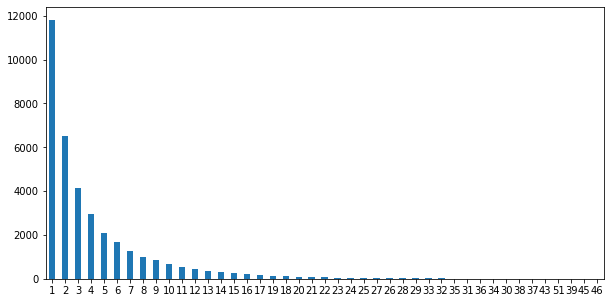

In [20]:
df.match.str.len().value_counts().plot.bar(figsize=(10,5), rot=0)

## Sports

Let's define a very simple rule contains sport

In [18]:
with open('sport.txt', 'r') as file:
    sport_list = file.read().split('\n')
sport_rule = '\w*|'.join(filter_list)
sport_rule =filter_rule[0:-4]
sport_rule

'threat\\w*|protest\\w*|strike\\w*|demonstra\\w*|violen\\w*|militar\\w*|coerc\\w*|repress\\w*|attack\\w*|bomb\\w*|terroris\\w*|assault\\w*|kill\\w*|tortur\\w*|curefew\\w*|destroy\\w*|explo\\w*|fight\\w*|artillery\\w*|weapon\\w*|mutilat\\w*|assa'

In [19]:
df[['sport']] = df['texts'].parallel_apply(lambda x: re.findall(sport_rule,x))
df[df.sport.str.len() > num_match]

/home/yibo/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/home/yibo/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yibo/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,filename,headlines,texts,match,sport
2,cna_eng_199806,WRECKAGE OF MISSING F-16 LOCATED IN WATERS OF...,"Following 70 days of intensive search, a nava...","[fighter, military, fighter, fighter, military...","[fighter, military, fighter, fighter, military..."
7,cna_eng_199806,ROC INTERIOR MINISTER CALLS FOR CROSS-STRAIT ...,Interior Minister Huang Chu-wen on Monday urg...,"[fighting, fighting, weapons]","[fighting, fighting, weapons]"
8,cna_eng_199806,TIME IS MAYOR CHEN'S BIGGEST CHALLENGE,Taipei City Mayor Chen Shui-bian said on Mond...,[threat],[threat]
13,cna_eng_199806,TAIWAN SEEKS PARTNER FOR F-5 FIGHTER UPGRADE,Taiwan's Aero Industry Development Center (AI...,"[fighters, fighter, military]","[fighters, fighter, military]"
16,cna_eng_199806,MAINLAND SPIES IN TAIWAN SAID NOT TO EXCEED D...,The number of mainland Chinese secret agents ...,"[threat, military]","[threat, military]"
...,...,...,...,...,...
71245,ltw_eng_199405,Benefits Systems Move Toward Cashless Automa...,"Welfare recipients, unemployed workers and mi...","[military, military, destroy]","[military, military, destroy]"
71246,ltw_eng_199405,"Grand Jury Says Rostenkowski Misused $500,00...",A federal grand jury Tuesday charged Rep. Dan...,"[fight, fight, fight, fight]","[fight, fight, fight, fight]"
71247,ltw_eng_199405,Government Benefits of the Future Will Come ...,In a step that eventually would eliminate pap...,[military],[military]
71248,ltw_eng_199405,Indictment Charges Rostenkowski With 17 Felo...,"Rep. Dan Rostenkowski, D-Ill., was indicted o...",[kills],[kills]
